Arthur Silva Rodrigues

# Tarefa

- Escreva um notebook para resolver os problemas abaixo.

- Colocar o seu nome na primeira célula do Notebook.

- O notebook deve estar com texto explicando o Notebook. Caso não tenha texto explicativo, será descontada nota.

- Entregue a tarefa no Google Sala de Aula na tarefa correspondente.

- A tarefa deve ser feita de forma individual.

- Qualquer gráfico que eventualmente seja feito deve ter seus eixos nomeados,  com unidades.

- Qualquer função feita deve ter a sua documentação.

- Sempre que for possível, não se deve repetir trechos de código.

**1)** Para esta tarefa você deve usar o arquivo [com os dados da competição de salto em distância masculino dos Jogos Olímpicos de Paris 2024](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/LongJump_olympics2024.csv). Neste arquivo são mostradas as distâncias atingidas pelos atletas em todos os saltos da competição, em metros, e a velocidade do vento durante o salto, em metros por segundo. Não são mostradas as tentativas em que o atleta decidiu não saltar.

- Faça o gráfico das distâncias atingidas em função da intensidade do vento.

- Faça a reta de regressão linear entre essas duas grandezas.

- Calcule o coeficiente de correlação entre essas grandezas.

- Comente sobre os resultados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

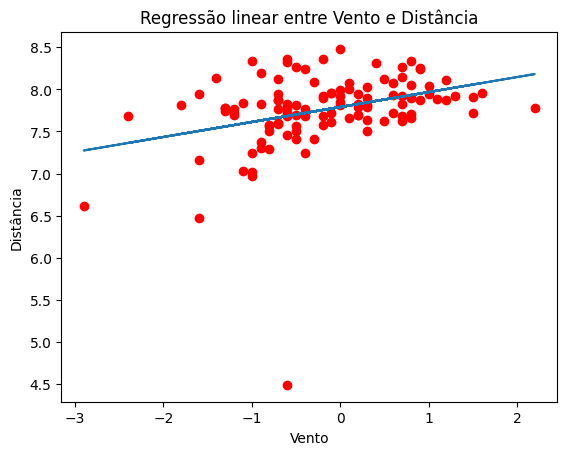

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

saltos = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/LongJump_olympics2024.csv')

saltos = saltos[saltos['Distância'] > 0]

m, b = np.polyfit(saltos['Vento'], saltos['Distância'], deg=1)

plt.figure()
plt.plot(saltos['Vento'], saltos['Distância'],
         marker='o', color='red', linestyle='')
plt.plot(saltos['Vento'], m*saltos['Vento'] + b)
plt.xlabel('Vento')
plt.ylabel('Distância')
plt.title('Regressão linear entre Vento e Distância')
plt.show()

Coeficiente de correlação:  0.33800802232325056


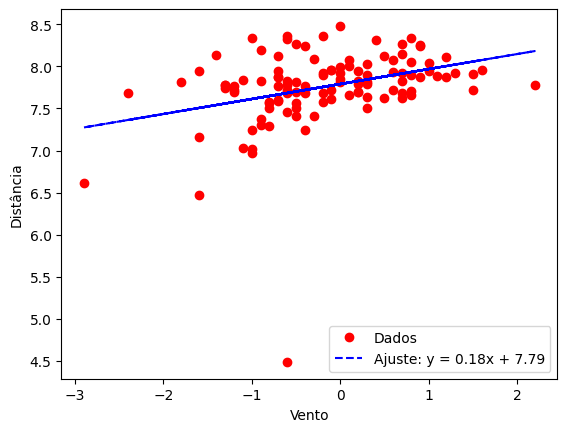

In [3]:
saltos = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/LongJump_olympics2024.csv')

saltos = saltos[saltos['Distância'] > 0]

correlação = saltos['Distância'].corr(saltos['Vento'])

print('Coeficiente de correlação: ', np.corrcoef(saltos['Vento'], saltos['Distância'])[0, 1])

m, b = np.polyfit(saltos['Vento'], saltos['Distância'], deg=1)

plt.figure()
plt.plot(saltos['Vento'], saltos['Distância'], marker='o', color='red', linestyle='', label='Dados')
plt.plot(saltos['Vento'], m * saltos['Vento'] + b, color='blue', linestyle='--', label='Ajuste: y = {:.2f}x + {:.2f}'.format(m, b))
plt.xlabel('Vento')
plt.ylabel('Distância')
plt.legend()






**2)** Utilize o arquivo [dos jogos do campeonato brasileiro de 2018](https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv). Faça um gráfico com a quantidade de gols em cada jogo em função da quantidade de dias que se passou após o início do campeonato. No mesmo gráfico, mostre a reta  da regressão linear entre essas grandezas e  calcule o coeficiente de correlação entre elas. Comente os resultados.

Dica: crie uma coluna com o total de gols e uma coluna com os dias decorridos desde o início do campeonato. Para calcular a quantidade de dias, será necessário transformar a coluna de data em formato de data. Isso é feito com a função `pd.to_datetime` (ver a aula [de base de dados para mais detalhes](https://colab.research.google.com/github/BMClab/BasesComputacionais/blob/master/aula5/BasesDeDados.ipynb)). Uma vez que a coluna esteja no formato de data, é possível usar a operação de subtração para ver a diferença entre entre duas datas. Após calcular essa diferença, utilizar `.dt.days` para ver quantos dias tem essa diferença.

<ipython-input-4-a4d97d532a82>:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  jogos['Data'] = pd.to_datetime(jogos['Data'])


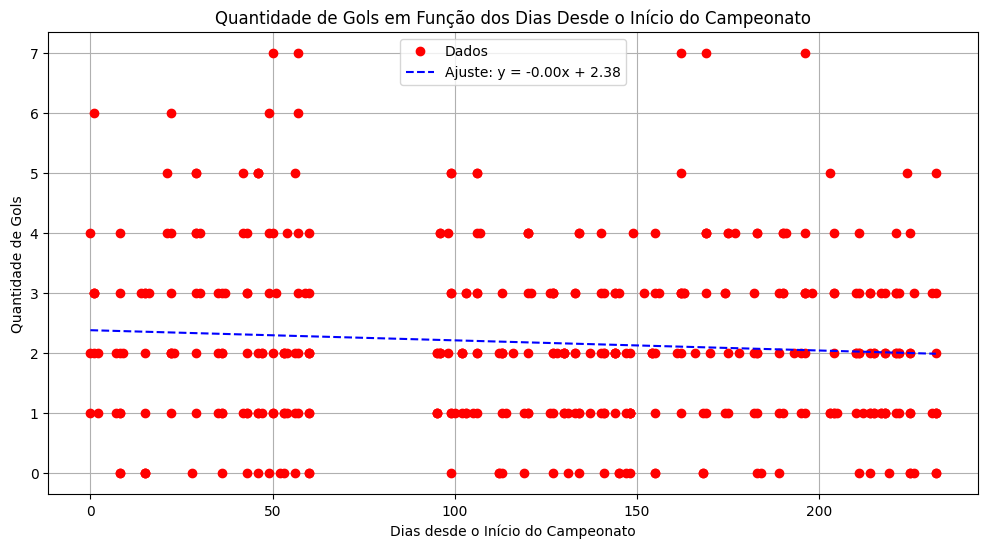

Coeficiente de Correlação entre Dias e Gols: -0.08


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados de jogos
jogos = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/tabelaBrasileirao2018.csv')

# converter a coluna 'Data'
jogos['Data'] = pd.to_datetime(jogos['Data'])

# Definir a data de início
inicio_campeonato = jogos['Data'].min()

# Calcular a quantidade de dias desde o início do campeonato para cada jogo
jogos['Dias'] = (jogos['Data'] - inicio_campeonato).dt.days

# Calcular a quantidade total de gols por jogo
jogos['Gols'] = jogos['Placar do Mandante'] + jogos['Placar do Visitante']

m, b = np.polyfit(jogos['Dias'], jogos['Gols'], deg=1)

# Calcular o coeficiente de correlação
correlation = jogos['Dias'].corr(jogos['Gols'])

# gráfico
plt.figure(figsize=(12, 6))
plt.plot(jogos['Dias'], jogos['Gols'], marker='o', color='red', linestyle='', label='Dados')
plt.plot(jogos['Dias'], m * jogos['Dias'] + b, color='blue', linestyle='--', label='Ajuste: y = {:.2f}x + {:.2f}'.format(m, b))
plt.xlabel('Dias desde o Início do Campeonato')
plt.ylabel('Quantidade de Gols')
plt.legend()
plt.title('Quantidade de Gols em Função dos Dias Desde o Início do Campeonato')
plt.grid(True)
plt.show()

# Exibir coeficiente de correlação
print(f"Coeficiente de Correlação entre Dias e Gols: {correlation:.2f}")